In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import csv

import pandas as pd

sns.set_context('paper', font_scale=2.5)
sns.set_style('white')
sns.mpl.rcParams['legend.frameon'] = 'False'
palette = sns.color_palette("Set2", 10)

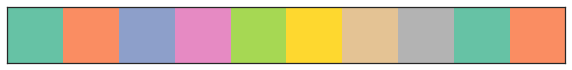

In [124]:
sns.palplot(palette)

In [131]:
num_nodes = [1, 2, 4, 8, 16, 30, 64]
data = [[]]*len(num_nodes)
times = []
for i, node in enumerate(num_nodes):
    with open('times_13_29_100_101_hoffman/times_mpi_' + str(node) + '_13_29_100_101.csv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            data[i].append(row)
        times.append(np.array([float(x) for x in data[i][-1]]))
times = np.array(times)        

timing_name = [
    'accelerated part', 
    'preparing to SCATTER conv+rad', 'SCATTER conv+rad', 'GATHER conv+rad', 
    'preparing to SCATTER local', 'SCATTER local', 'GATHER local',
    'convection', 'radial diffusion', 'local diffusion',
    'write to file', 'data update',
    'total', 'total (check sum)'
    ]

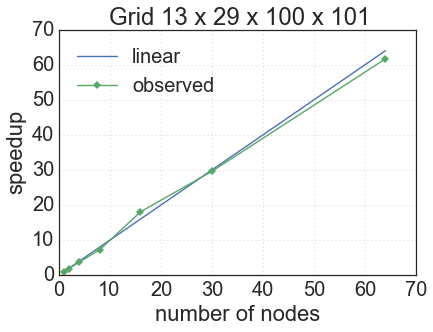

In [139]:
keys = ['accelerated part']
ind = []

speedup = np.zeros((len(keys), len(num_nodes)))
for key in keys:
    ind.append(timing_name.index(key))
for alpha in range(len(keys)):
    for i, node in enumerate(num_nodes):
        speedup[alpha, i] = times[0][ind[alpha]]/times[i][ind[alpha]]

plt.plot([1, 64], [1, 64], label="linear")
for alpha in range(len(keys)):
    plt.plot(num_nodes, speedup[alpha, :], 'D-', label="observed")
plt.xlabel("number of nodes")
plt.ylabel("speedup")
plt.title('Grid 13 x 29 x 100 x 101')
plt.grid(ls=":")
plt.legend(loc='best')

In [62]:
pd.DataFrame({'SpeedUp': speedup[0, :]}, index=num_nodes)

,SpeedUp
1,1.000000
2,1.904476
4,3.742902
8,7.241428
16,18.064746
30,29.609172
64,61.678407


In [135]:
times_new = np.zeros((len(num_nodes), 9))
times_new[:, 2:] = times[:, 7:]
times_new[:, 1] = times[:, 1:7].sum(axis=1)
times_new[:, 0] = times[:, 0]
timing_name_new = [None]*9
timing_name_new[0] = timing_name[0]
timing_name_new[1] = 'Send + Receive'
timing_name_new[2:] = timing_name[7:]

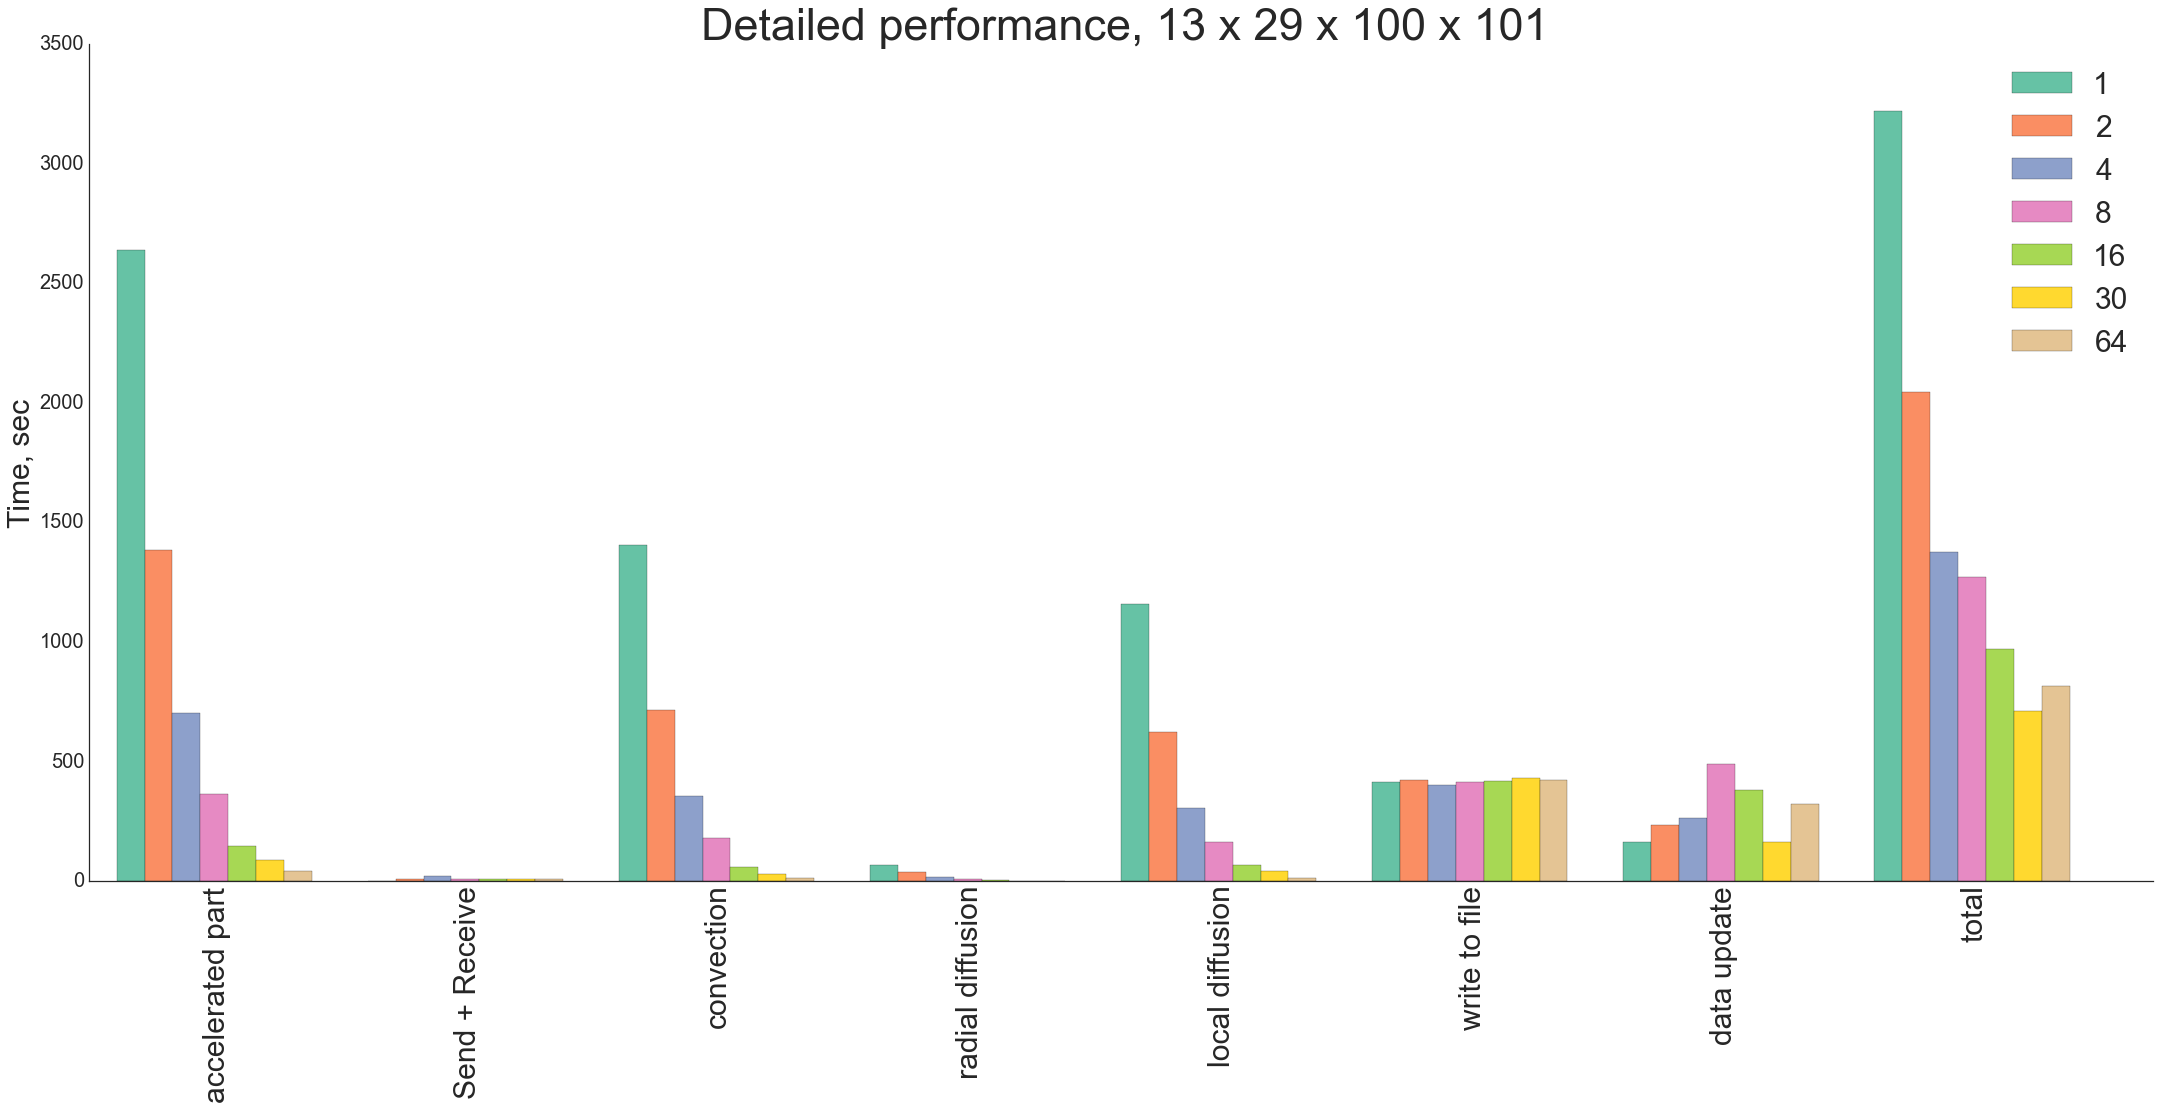

In [138]:
fig = plt.figure(figsize=(37, 15))
ax = fig.add_subplot(111)
import matplotlib
matplotlib.rcParams.update({'font.size': 30})

width = 1./9
ind = np.arange(len(timing_name_new[:-1]))

for i, node in enumerate(num_nodes):
    ax.bar(ind + i*width, times_new[i, :-1], width, color=palette[i], label=str(node))

font_size = 30

xtickNames = ax.set_xticklabels(timing_name_new[:-1], size=font_size)
plt.setp(xtickNames, rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xticks(ind + 0.4)
ax.set_xlim(-width, len(ind) + len(keys)*width)
ax.set_ylabel('Time, sec', size=font_size)
ax.set_title('Detailed performance, 13 x 29 x 100 x 101', size=45)
#ax.set_yscale('log')
ax.legend(loc='best', fontsize=font_size)